# **SIN 393 – Introduction to Computer Vision (2024)**

# Lecture 01 - Part 1 - A simple classification problem

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

## Importing the required libraries
---

In [1]:
import os

import numpy as np
from sklearn import datasets, model_selection, neighbors, metrics, preprocessing
## import sklearn.datasets as ds

### from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### %matplotlib notebook
### %matplotlib widget

## The dataset 
---
* Iris dataset:

In [2]:
# Loading the IRIS dataset
iris = datasets.load_iris()

feature_mat = iris.data
true_list = iris.target
class_names = iris.target_names
feature_names = iris.feature_names

print(class_names)
print(feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Plotting the dataset

* Important to start understanding the dataset.

In [3]:
df = pd.DataFrame(feature_mat, columns=feature_names)
label_list =  [class_names[i] for i in true_list]
df['class'] = label_list

### print(df)
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


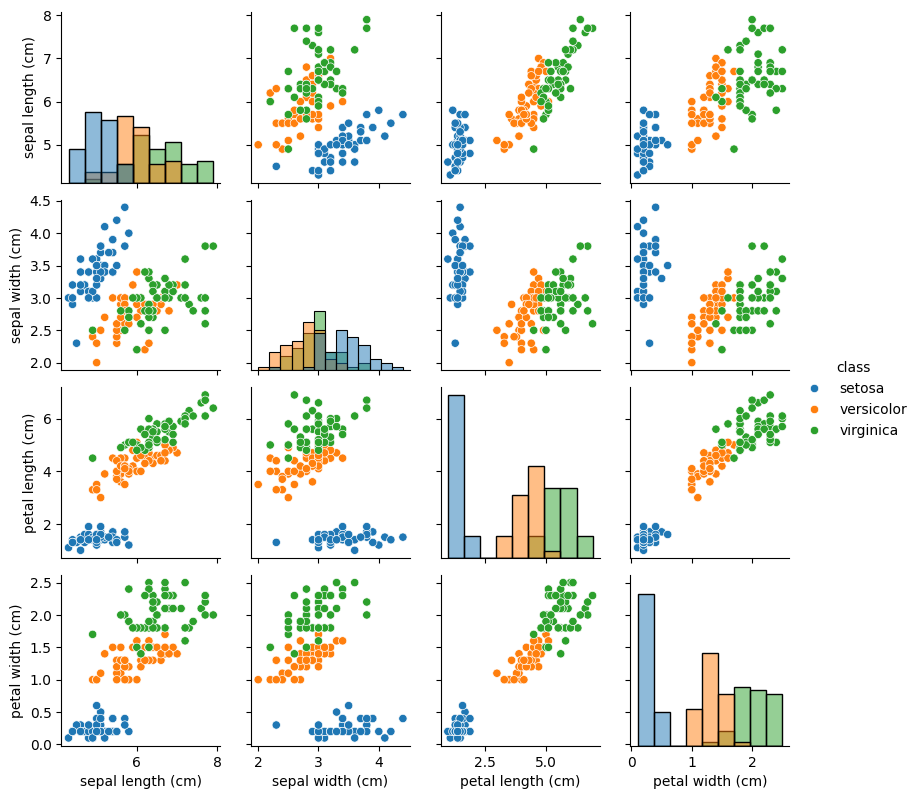

In [4]:
g = sns.PairGrid(df, hue='class', vars=feature_names)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Simplifing the problem

* Select the classes that will be coinsidered:
    * 0: setosa, 1: versicolor, 2: virginica
* Select the features that will be considered:
    * 0: sepal length, 1: sepal width, 2: petal length, 3: petal width

In [5]:
class_list = [0, 1, 2]
feat_list = [0, 2]

In [6]:
# Keep only the classes in class_list
X = feature_mat[np.isin(true_list, class_list)]
y = true_list[np.isin(true_list, class_list)]

# Keeps only the features in feat_list
X = X[:, feat_list]

print(X.shape, y.shape)

(150, 2) (150,)


## Cross-Validation - Hold-Out
---

* The dataset is split into subsets for training, validation, and testing.
    * In this example, for simplicity, we will only divide it into training and testing.

In [7]:
# Split the dataset into 'X' based on the labels in 'y'.
# Allocate 30% of the images to the test set and the remaining 70% to the training set.
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.3, 
                                                                    random_state=42)

In [8]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(105, 2) (45, 2)
(105,) (45,)


### Normalizing the features

* Normalization relies exclusively on the statistics of the training set.
    * The mean and standard deviation of the features are used.

In [9]:
# Mean of the training set features
X_train_mean = X_train.mean(0)
# Standard deviation of the training set features
X_train_std = X_train.std(0)

with np.printoptions(precision=4, suppress=True):
    print(X_train.mean(0))
    print(X_train.std(0))

[5.8429 3.8705]
[0.8293 1.7131]


In [10]:
# Normal Feature Transform (Standard Scaler)
X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std

with np.printoptions(precision=4, suppress=True):
    print(X_train_norm.mean(0))
    print(X_test_norm.mean(0))
    print(X_train_norm.std(0))
    print(X_test_norm.std(0))

[ 0. -0.]
[ 0.0019 -0.2189]
[1. 1.]
[0.9837 1.0719]


In [11]:
df = pd.DataFrame(X_train_norm, columns=['sepal length', 'petal length'])
label_list =  [class_names[i] for i in y_train]
df['class'] = label_list

### print(df)
display(df)

,sepal length,petal length,class
0,-0.413416,-0.099511,versicolor
1,0.551222,0.717703,virginica
2,0.671802,0.951192,virginica
3,0.912961,0.309096,versicolor
4,1.636440,1.301427,virginica
...,...,...,...
100,0.310062,0.075606,versicolor
101,-1.136895,0.367468,virginica
102,-0.051677,-1.558821,setosa
103,-0.051677,0.075606,versicolor


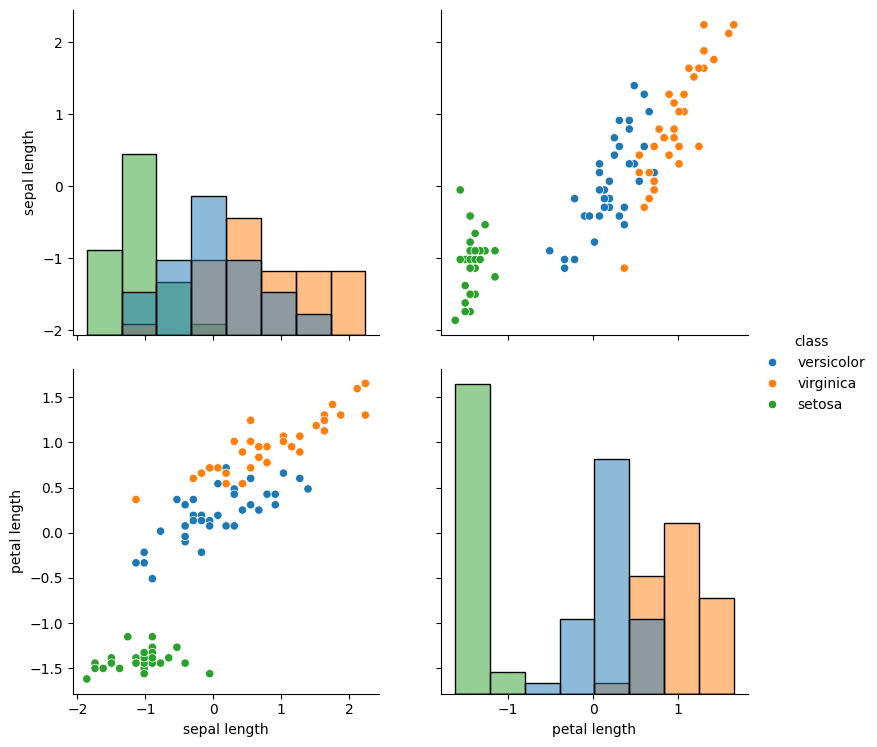

In [12]:
g = sns.PairGrid(df, hue='class', vars=['sepal length', 'petal length'])
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Training a classifier

* Let's train a K-NN classifier.

In [13]:
# Build a K-NN classifier with k = 3.
clf = neighbors.KNeighborsClassifier(n_neighbors=3)

# Training the classifier 
clf.fit(X_train_norm, y_train)

# Making predictions with the classifier
pred = clf.predict(X_test_norm)

In [14]:
# Hits
acertos = y_test == pred

print('\nHit/Error:')
print(acertos.astype(int))


Hit/Error:
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


### Confusion matrix and classification report

In [ ]:
print('\nConfusion matrixF:')
print(metrics.confusion_matrix(y_test, pred))

print('\nClassification report:')
print(metrics.classification_report(y_test, pred, target_names=class_names))


Confusion matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  1 12]]

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [16]:
print('Done!')

Done!
